In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import svm 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from util import *

train_split=0.7 # fraction of the data used in a training set

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load raw data
oasis = pd.read_csv('oasis_longitudinal.csv')  
oasis = oasis.dropna()
oasis.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


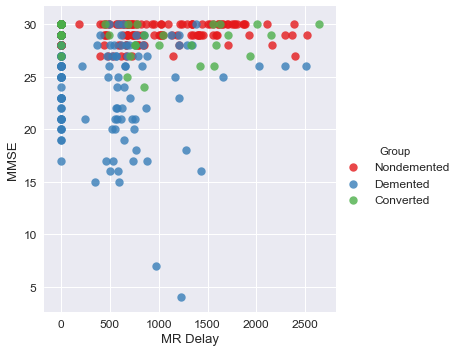

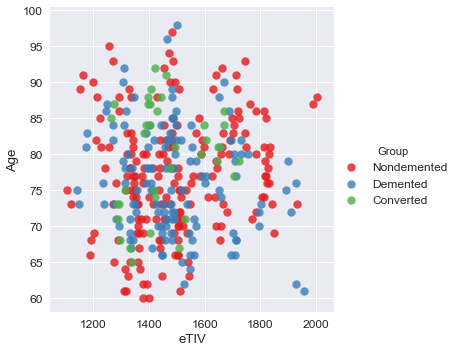

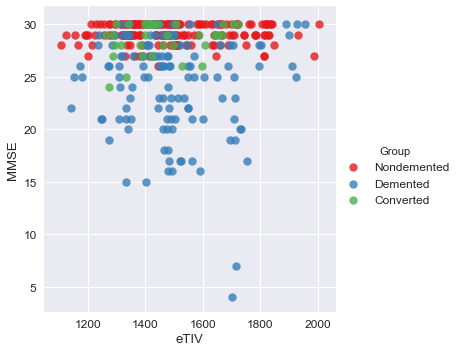

In [3]:
# Plot 2D relationship to highlight any correlating or separable features.
sns.lmplot('MR Delay', 'MMSE', data=oasis, hue='Group', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('eTIV', 'Age', data=oasis, hue='Group', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('eTIV', 'MMSE', data=oasis, hue='Group', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [4]:
# Preprocess and split data into train and test.
x_train, y_train, x_test, y_test = preprocess_split(oasis, train_split)
print('oasis train labels preprocssed.')

oasis train labels preprocssed.


In [5]:
# Fit a linear kernel SVM model
linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Evaluate using test set.
output_label = {0:'Converted', 1:'Demented', 2:'Nondemented'}
predicted_labels = linearsvm_model.predict(x_test)

acc = np.sum(predicted_labels == y_test) / y_test.size
positive_acc = np.sum((predicted_labels == 1) & (y_test == 1))/ np.sum(y_test == 1)

print('Linear kernel svm')
print ('accuracy %', acc*100)
print('Correct Demented accuracy %', positive_acc*100)

print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

Linear kernel svm
accuracy % 83.8095238095
Correct Demented accuracy % 85.7142857143
sklearn acc training acc:  0.935222672065
sklearn acc test acc:  0.838095238095


Confusion matrix
[[ 5  5  6]
 [ 4 30  1]
 [ 1  0 53]]


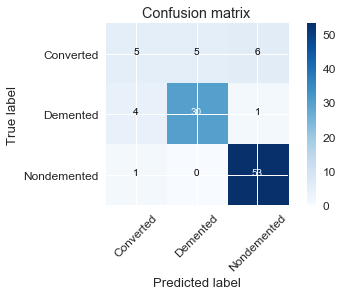

In [7]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Converted','Demented','Nondemented'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

Confusion matrix
[[ 0  0 16]
 [ 0  0 35]
 [ 0  0 54]]


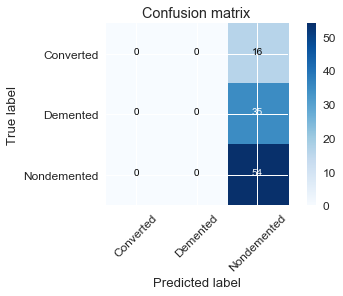

In [8]:
# Fit a RBF kernel SVM model.
linearsvm_model = svm.SVC(kernel='rbf', gamma=10**4, C=10**4)
linearsvm_model.fit(x_train, y_train)
predicted_labels = linearsvm_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [9]:
# Fit a RBF kernel SVM model.
# Too slow even with extra cache, skip.

# linearsvm_model = svm.SVC(kernel='poly', degree=2, cache_size=8000)
# linearsvm_model.fit(x_train, y_train)
# predicted_labels = linearsvm_model.predict(x_test)
# cnf_matrix=confusion_matrix(y_test, predicted_labels)
# plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [57]:
######################################################################
#################### Load raw TADPOLE Data. ##########################
######################################################################

tadpole = pd.read_csv('tadpole_filtered.csv')  
tadpole = tadpole.dropna()
tadpole.head()

,RID,DX_bl,AGE,PTGENDER,PTMARRY,FLDSTRENG,Ventricles,Hippocampus,WholeBrain,Entorhinal,...,ST23TS_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24CV_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24SA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24TA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24TS_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25CV_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25SA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25TA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25TS_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST26CV_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16
1,3,AD,81.3,Male,Married,1.5 Tesla MRI,84599,5319,1129830,1791,...,0.406,1267,603,1.692,1.025,545,157,2.526,0.657,7995
2,4,LMCI,67.5,Male,Married,1.5 Tesla MRI,39605,6869,1154980,3983,...,0.385,1981,395,3.434,0.956,521,139,2.826,0.346,10703
3,5,CN,73.7,Male,Married,1.5 Tesla MRI,34062,7075,1116630,4433,...,0.385,1839,431,2.846,0.871,755,216,2.78,0.509,12037
4,6,LMCI,80.4,Female,Married,1.5 Tesla MRI,39826,5348,927510,2277,...,0.467,1283,387,2.448,0.861,609,149,2.853,0.36,8929
5,7,AD,75.4,Male,Married,1.5 Tesla MRI,25704,6729,875798,2050,...,0.454,1288,496,2.015,0.66,795,199,3.013,0.442,5462


In [63]:
x_train, y_train, x_test, y_test = ps_tadpole(tadpole, train_split)
print('xt',x_train)
print('tadpole train labels preprocssed.')

xt [[  1.00000000e+00   8.13000000e+01   8.45990000e+04 ...,   2.52600000e+00
    6.57000000e-01   7.99500000e+03]
 [  1.00000000e+00   6.75000000e+01   3.96050000e+04 ...,   2.82600000e+00
    3.46000000e-01   1.07030000e+04]
 [  1.00000000e+00   7.37000000e+01   3.40620000e+04 ...,   2.78000000e+00
    5.09000000e-01   1.20370000e+04]
 ..., 
 [  0.00000000e+00   6.69000000e+01   6.54930000e+04 ...,   2.68600000e+00
    4.87000000e-01   9.06500000e+03]
 [  1.00000000e+00   7.24000000e+01   2.45450000e+04 ...,   2.60800000e+00
    5.93000000e-01   8.52600000e+03]
 [  0.00000000e+00   7.08000000e+01   5.11260000e+04 ...,   2.37300000e+00
    4.82000000e-01   7.74400000e+03]]
tadpole train labels preprocssed.


In [64]:
# Fit a linear kernel SVM model
linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
# Evaluate using test set.
output_label = {0:'Converted', 1:'Demented', 2:'Nondemented'}
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

sklearn acc training acc:  0.527514231499
sklearn acc test acc:  0.625


Confusion matrix
[[  3  32   0   1]
 [ 17 134   0  10]
 [  1   0   0   0]
 [  1  22   0   3]]


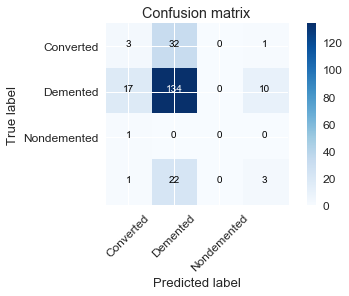

In [66]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Converted','Demented','Nondemented'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [18]:
######################################################################
#################### Load raw TADPOLE Data COMPLETE. ##########################
######################################################################
biomarkers = [
               'FDG', 'AV45',
               'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17',
               'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp'
            ]
tadpole2 = pd.read_csv('TADPOLE_D1_D2.csv',
                       usecols=biomarkers + ['DX'],
                       low_memory=False)  
tadpole2 = tadpole2.dropna()
tadpole2

,FDG,AV45,Hippocampus,WholeBrain,Entorhinal,MidTemp,DX,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17
59,1.472450,1.128200,7672.0,1026760.0,3925.0,19666.0,NL,,,
91,1.045950,1.000870,3515.0,888396.0,2356.0,15272.0,Dementia,1483,238.8,19.56
125,1.415650,0.964111,7447.0,913570.0,2800.0,14335.0,NL,1198,154.9,15.18
141,1.401800,0.998996,6798.0,842989.0,2816.0,13712.0,NL,1616,180.1,16.22
173,1.320800,0.986278,7766.0,1145390.0,3431.0,22440.0,NL,,,
187,1.022770,1.305870,6779.0,980298.0,3366.0,17929.0,MCI,,,
233,1.320140,0.985183,7450.0,1082170.0,4314.0,24015.0,NL,1314,168.7,16.35
257,1.190170,0.968660,7346.0,1050670.0,2951.0,22319.0,NL,719.3,138.5,12.5
319,1.301000,0.903027,6258.0,1091950.0,4599.0,20551.0,NL,,,
333,1.357170,1.036540,7262.0,1077400.0,3773.0,21040.0,NL,,,


In [32]:
########### USING OTHER BIOMARKERS #############
x_train, y_train, x_test, y_test = ps_tadpole2(tadpole2, train_split, biomarkers)
print('xt',x_train)
print('tadpole train labels preprocssed.')

xn             FDG      AV45  Hippocampus  WholeBrain  Entorhinal  MidTemp  \
91     1.045950  1.000870       3515.0    888396.0      2356.0  15272.0   
125    1.415650  0.964111       7447.0    913570.0      2800.0  14335.0   
141    1.401800  0.998996       6798.0    842989.0      2816.0  13712.0   
233    1.320140  0.985183       7450.0   1082170.0      4314.0  24015.0   
257    1.190170  0.968660       7346.0   1050670.0      2951.0  22319.0   
359    1.160490  1.001420       6624.0    902953.0      4753.0  18491.0   
467    1.181600  1.317350       6331.0    938174.0      2918.0  19588.0   
498    1.314320  0.965052       7801.0   1004150.0      4181.0  19739.0   
655    1.242860  1.007670       7559.0   1085530.0      4237.0  23945.0   
722    1.277000  1.464880       6751.0   1094740.0      3943.0  19620.0   
760    1.220720  1.146250       7139.0    934415.0      4241.0  18829.0   
888    1.182760  0.904325       5937.0    912442.0      3809.0  18603.0   
1163   1.322950  0.939

In [33]:
# Fit a linear kernel SVM model
linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Evaluate using test set.
output_label = {0:'Converted', 1:'Demented', 2:'Nondemented'}
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

sklearn acc training acc:  0.557755775578
sklearn acc test acc:  0.378378378378


Confusion matrix
[[ 0 55  0  1  0]
 [ 0 91  0  2  0]
 [ 0  3  0  0  0]
 [ 0 99  0  7  0]
 [ 0  1  0  0  0]]


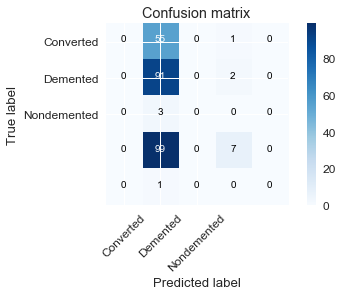

In [36]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Converted','Demented','Nondemented'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')